In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%load_ext autoreload
%autoreload 2

In [14]:
import sys
sys.path.insert(0, "../")
import guitarHarmony as gt
print(gt.__version__)
from itertools import product
import random

0.5.4


('C', 4, 'C4', 1.0)

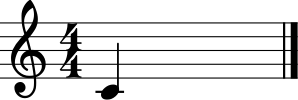

In [57]:
import guitarHarmony as gt
a=gt.Note()
a.name, a.octave, a.nameWithOctave, a.duration
# a.show('notation')
a.show('midi')
a.show('')

('Fb', 5, 'Fb5', 2.5)

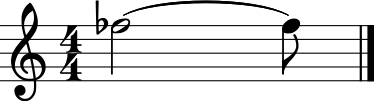

In [22]:
import guitarHarmony as gt
a=gt.Note('Fb5', 2.5)
a.name, a.octave, a.nameWithOctave, a.duration
# a.show('notation')
a.show('midi')
a.show('')

Inv.P1


Inv.P1


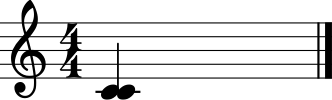

Inv.A1


Inv.A1


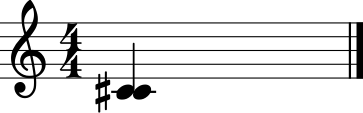

Inv.d2


Inv.d2


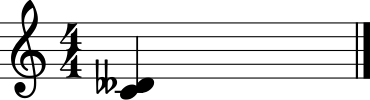

In [30]:
import guitarHarmony as gt
for intv in gt.Interval.displayAllIntervals()[:3]:
    gt.Interval(intv).show('midi')
    gt.Interval(intv).show()

[Note(C), Note(E), Note(G), Note(Bb)]

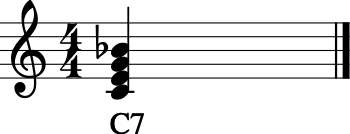

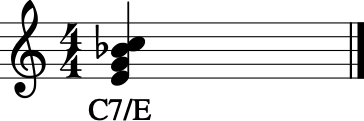

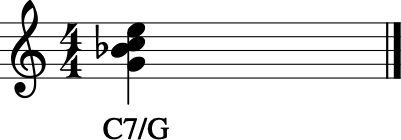

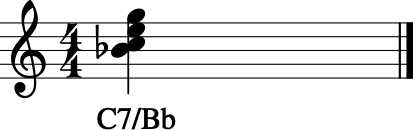

[Note(C), Note(E), Note(G)]

[Note(C), Note(Eb), Note(G)]

[Note(C), Note(Eb), Note(Gb)]

In [46]:
import guitarHarmony as gt
root='C'
chord_type='7'
chord = gt.Chord(root, chord_type)
chord.chord_notes
for i in range(4):
    chord.getInversion(i).show('notation')

root = 'CDEFGAB'
for t in gt.Chord.displayAllChordsRecipe()[:3]:
    gt.Chord('C', chord_type=t).buildArpeggio()

C5
G
A.m
G.7
F
G.7
C
C5
G
A.m
G.7
F
G.7
C


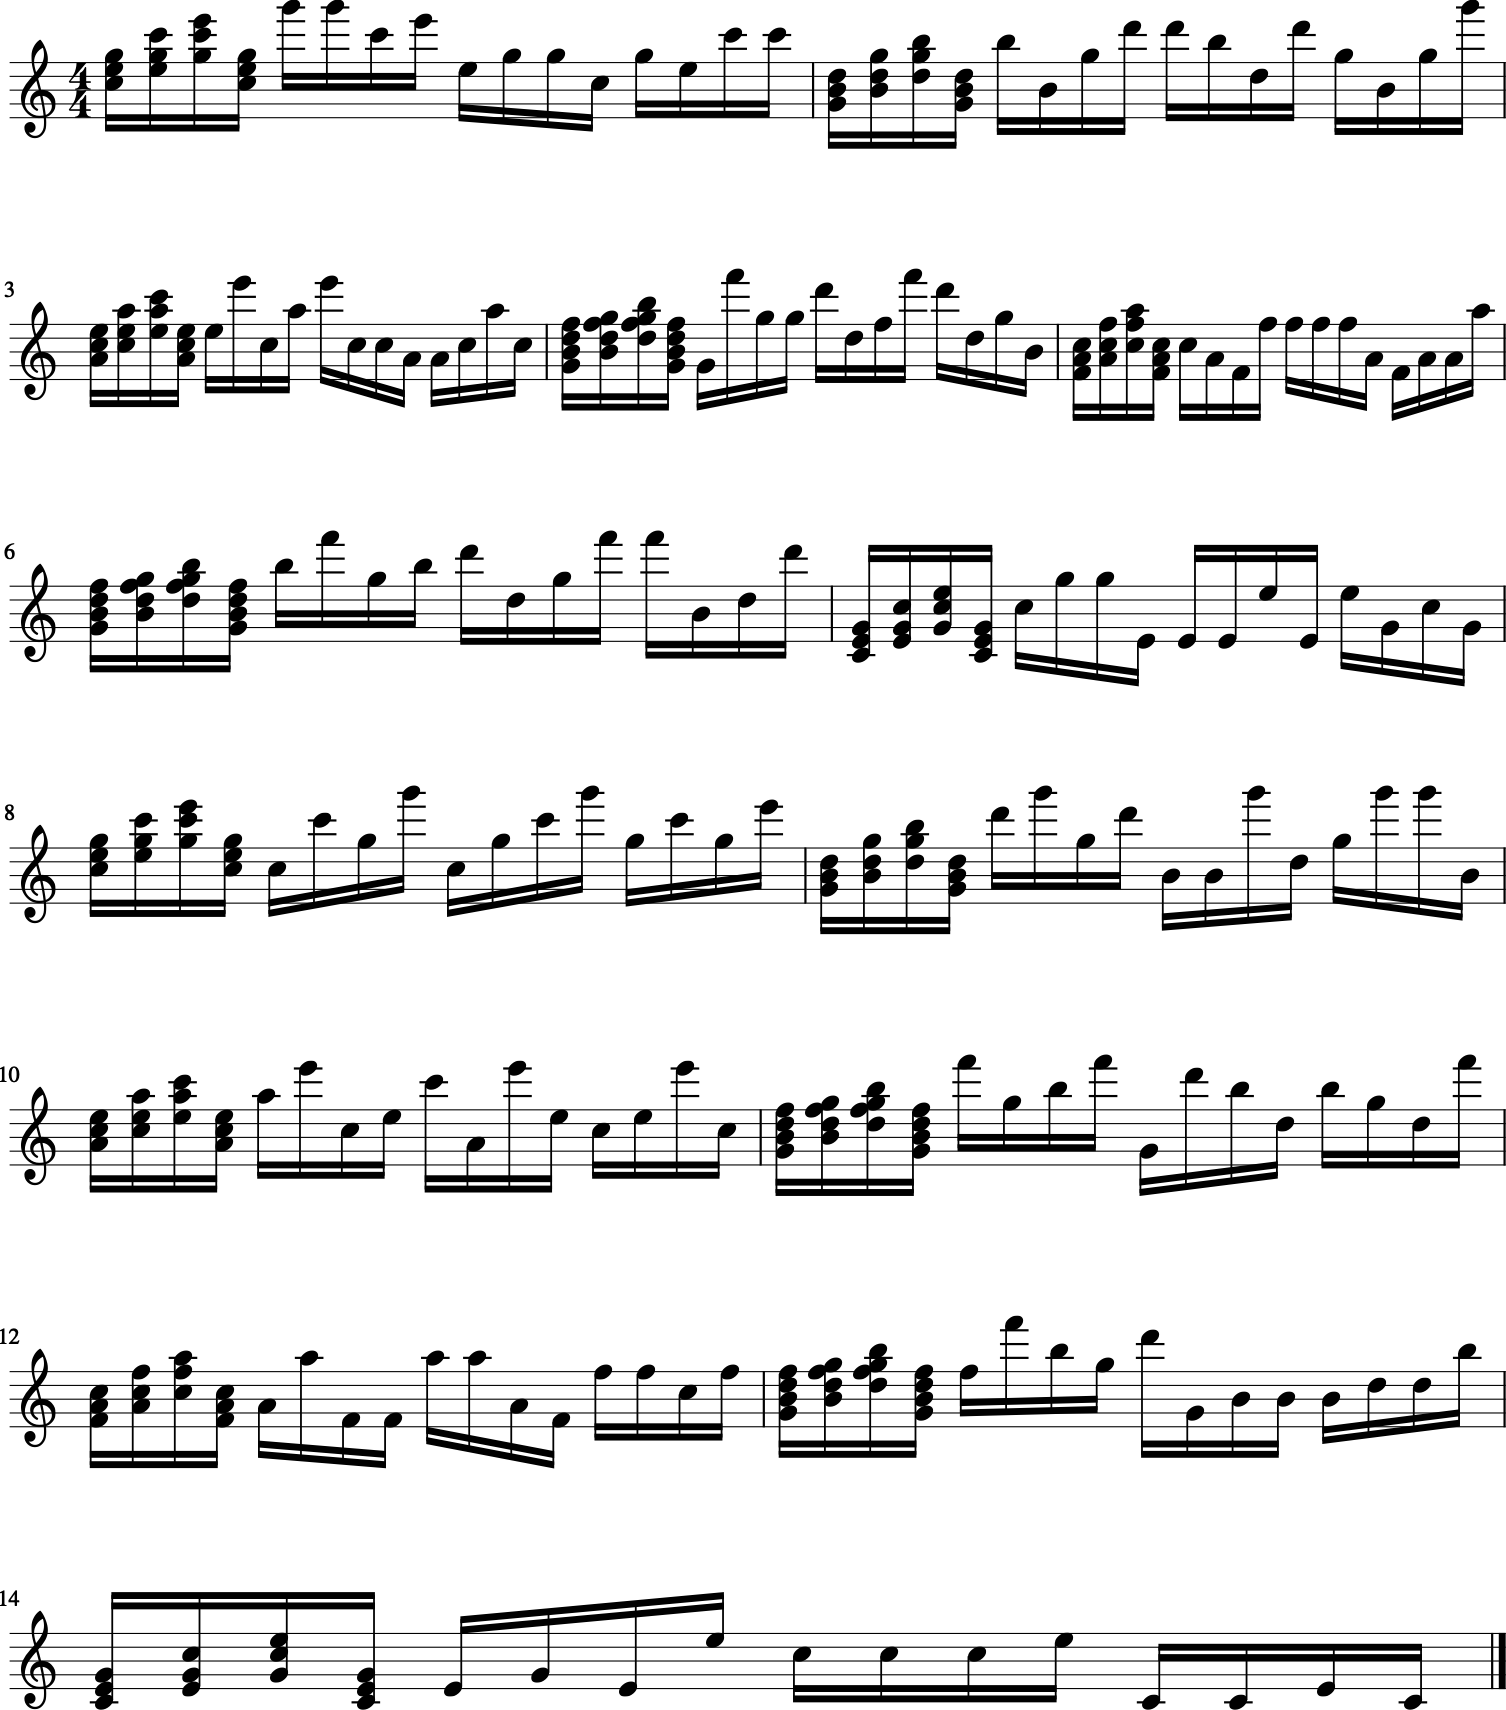

In [152]:
import guitarHarmony as gt
elements  = []
#"we don't talk anymore."
# chord_set = ['A', 'B.maj7', 'C#.m7', 'G#.m9']
# chord_set = ['C.maj7', 'A.m7', 'F.maj7', 'G.7']
# inversion_set = '0000'
chord_set = ['C5', 'G', 'A.m','G.7','F','G.7','C']
inversion_set = '0100000'
l = len(chord_set)
d = 1/4
for idx in range(l*2):
    chord = gt.Chord.pharseChord(chord_set[idx%l], inversion=int(inversion_set[idx%l]), duration=d)
    ap = [random.choice(chord.chord_notes).setDuration(d).changeOctave(random.choice([0, 1])) for _ in range(int(3/d))]
    elements.append([chord.getInversion(i%3) for i in range(int(1/d))]+ ap)
import random
s = gt.Stream([el for elset in elements for el in elset])
# s.show('notation')
s.show()
s.show('midi')